In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
rohdaten = np.load("I:/Daten/FH BI Maschinenbau/Bachelor Thesis/Crawler Code/Q-Learning/Observations/observations.npy")

In [5]:
df = pd.DataFrame(rohdaten, columns = [
't', 
'actionIndex', 
'reward', 
'totalReward', 
'epsilon', 
'Crawler.lastDistance',
'deltaDistance', 
'oldQValue', 
'temporalDifference',
'newQValue', 
'servoArmOldState', 
'Crawler.servoArmCurrentAngle', 
'servoArmNewState', 
'servoHandOldState',
'Crawler.servoHandCurrentAngle', 
'servoHandNewState', 
'Crawler.servoArmNumberOfStates', 
'Crawler.servoHandNumberOfStates',
'numActions', 
'discountFactor', 
'learningRate'])

In [6]:
df.head()

,t,actionIndex,reward,totalReward,epsilon,Crawler.lastDistance,deltaDistance,oldQValue,temporalDifference,newQValue,...,Crawler.servoArmCurrentAngle,servoArmNewState,servoHandOldState,Crawler.servoHandCurrentAngle,servoHandNewState,Crawler.servoArmNumberOfStates,Crawler.servoHandNumberOfStates,numActions,discountFactor,learningRate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   t                                500 non-null    float64
 1   actionIndex                      500 non-null    float64
 2   reward                           500 non-null    float64
 3   totalReward                      500 non-null    float64
 4   epsilon                          500 non-null    float64
 5   Crawler.lastDistance             500 non-null    float64
 6   deltaDistance                    500 non-null    float64
 7   oldQValue                        500 non-null    float64
 8   temporalDifference               500 non-null    float64
 9   newQValue                        500 non-null    float64
 10  servoArmOldState                 500 non-null    float64
 11  Crawler.servoArmCurrentAngle     500 non-null    float64
 12  servoArmNewState      

In [8]:
df.describe()

,t,actionIndex,reward,totalReward,epsilon,Crawler.lastDistance,deltaDistance,oldQValue,temporalDifference,newQValue,...,Crawler.servoArmCurrentAngle,servoArmNewState,servoHandOldState,Crawler.servoHandCurrentAngle,servoHandNewState,Crawler.servoArmNumberOfStates,Crawler.servoHandNumberOfStates,numActions,discountFactor,learningRate
count,500.000000,500.000000,500.0,500.000000,5.000000e+02,500.000000,500.0,500.000000,500.000000,500.000000,...,500.000000,500.0,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.998000,0.002000,0.0,34.360000,4.472518e-07,-1.760000,0.0,0.654000,-0.065400,0.595140,...,0.254000,0.0,0.002000,0.168000,0.002000,0.008000,0.008000,0.008000,0.001800,0.001800
std,22.315958,0.044721,0.0,768.312957,1.000085e-05,39.354796,0.0,14.623885,1.462388,13.307735,...,5.679613,0.0,0.044721,3.756594,0.044721,0.178885,0.178885,0.178885,0.040249,0.040249
min,0.000000,0.000000,0.0,0.000000,0.000000e+00,-880.000000,0.0,0.000000,-32.700000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,499.000000,1.000000,0.0,17180.000000,2.236259e-04,0.000000,0.0,327.000000,0.000000,297.570000,...,127.000000,0.0,1.000000,84.000000,1.000000,4.000000,4.000000,4.000000,0.900000,0.900000


<function matplotlib.pyplot.show(close=None, block=None)>

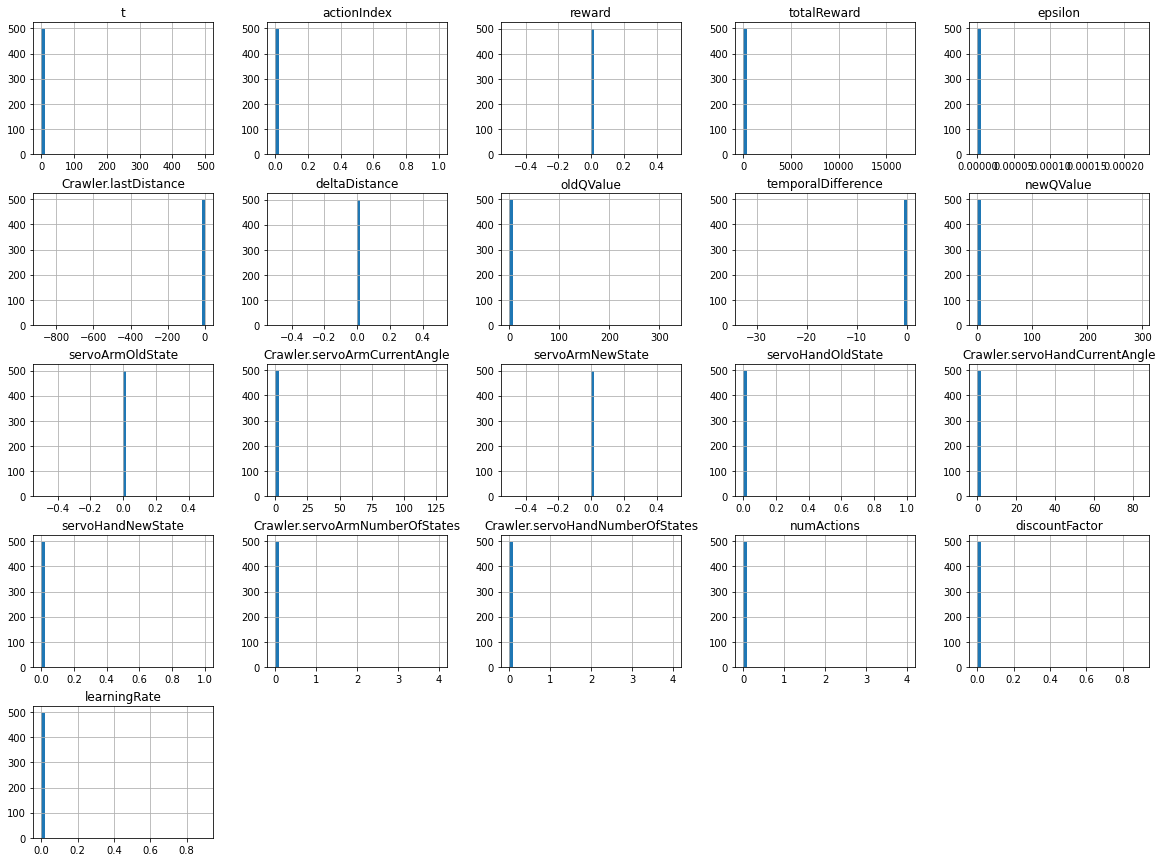

In [9]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='t', ylabel='epsilon'>

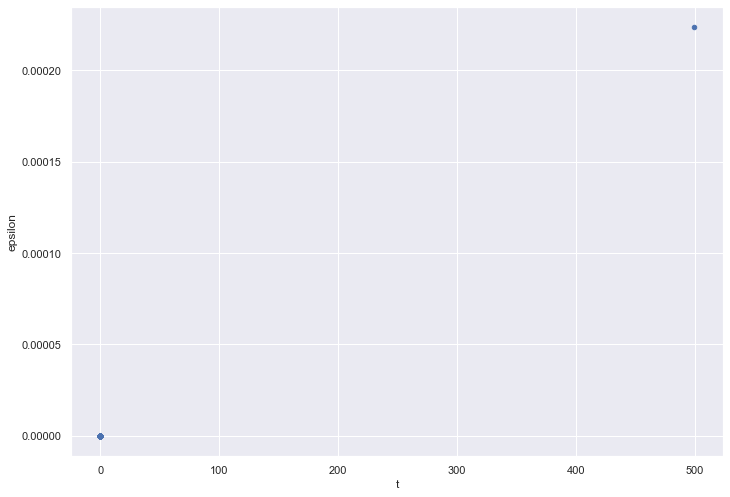

In [22]:
df.plot(kind="scatter", x="t", y="epsilon")

<AxesSubplot:xlabel='t', ylabel='actionIndex'>

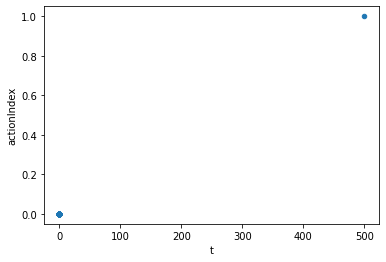

In [12]:
df.plot(kind="scatter", x="t", y="actionIndex")

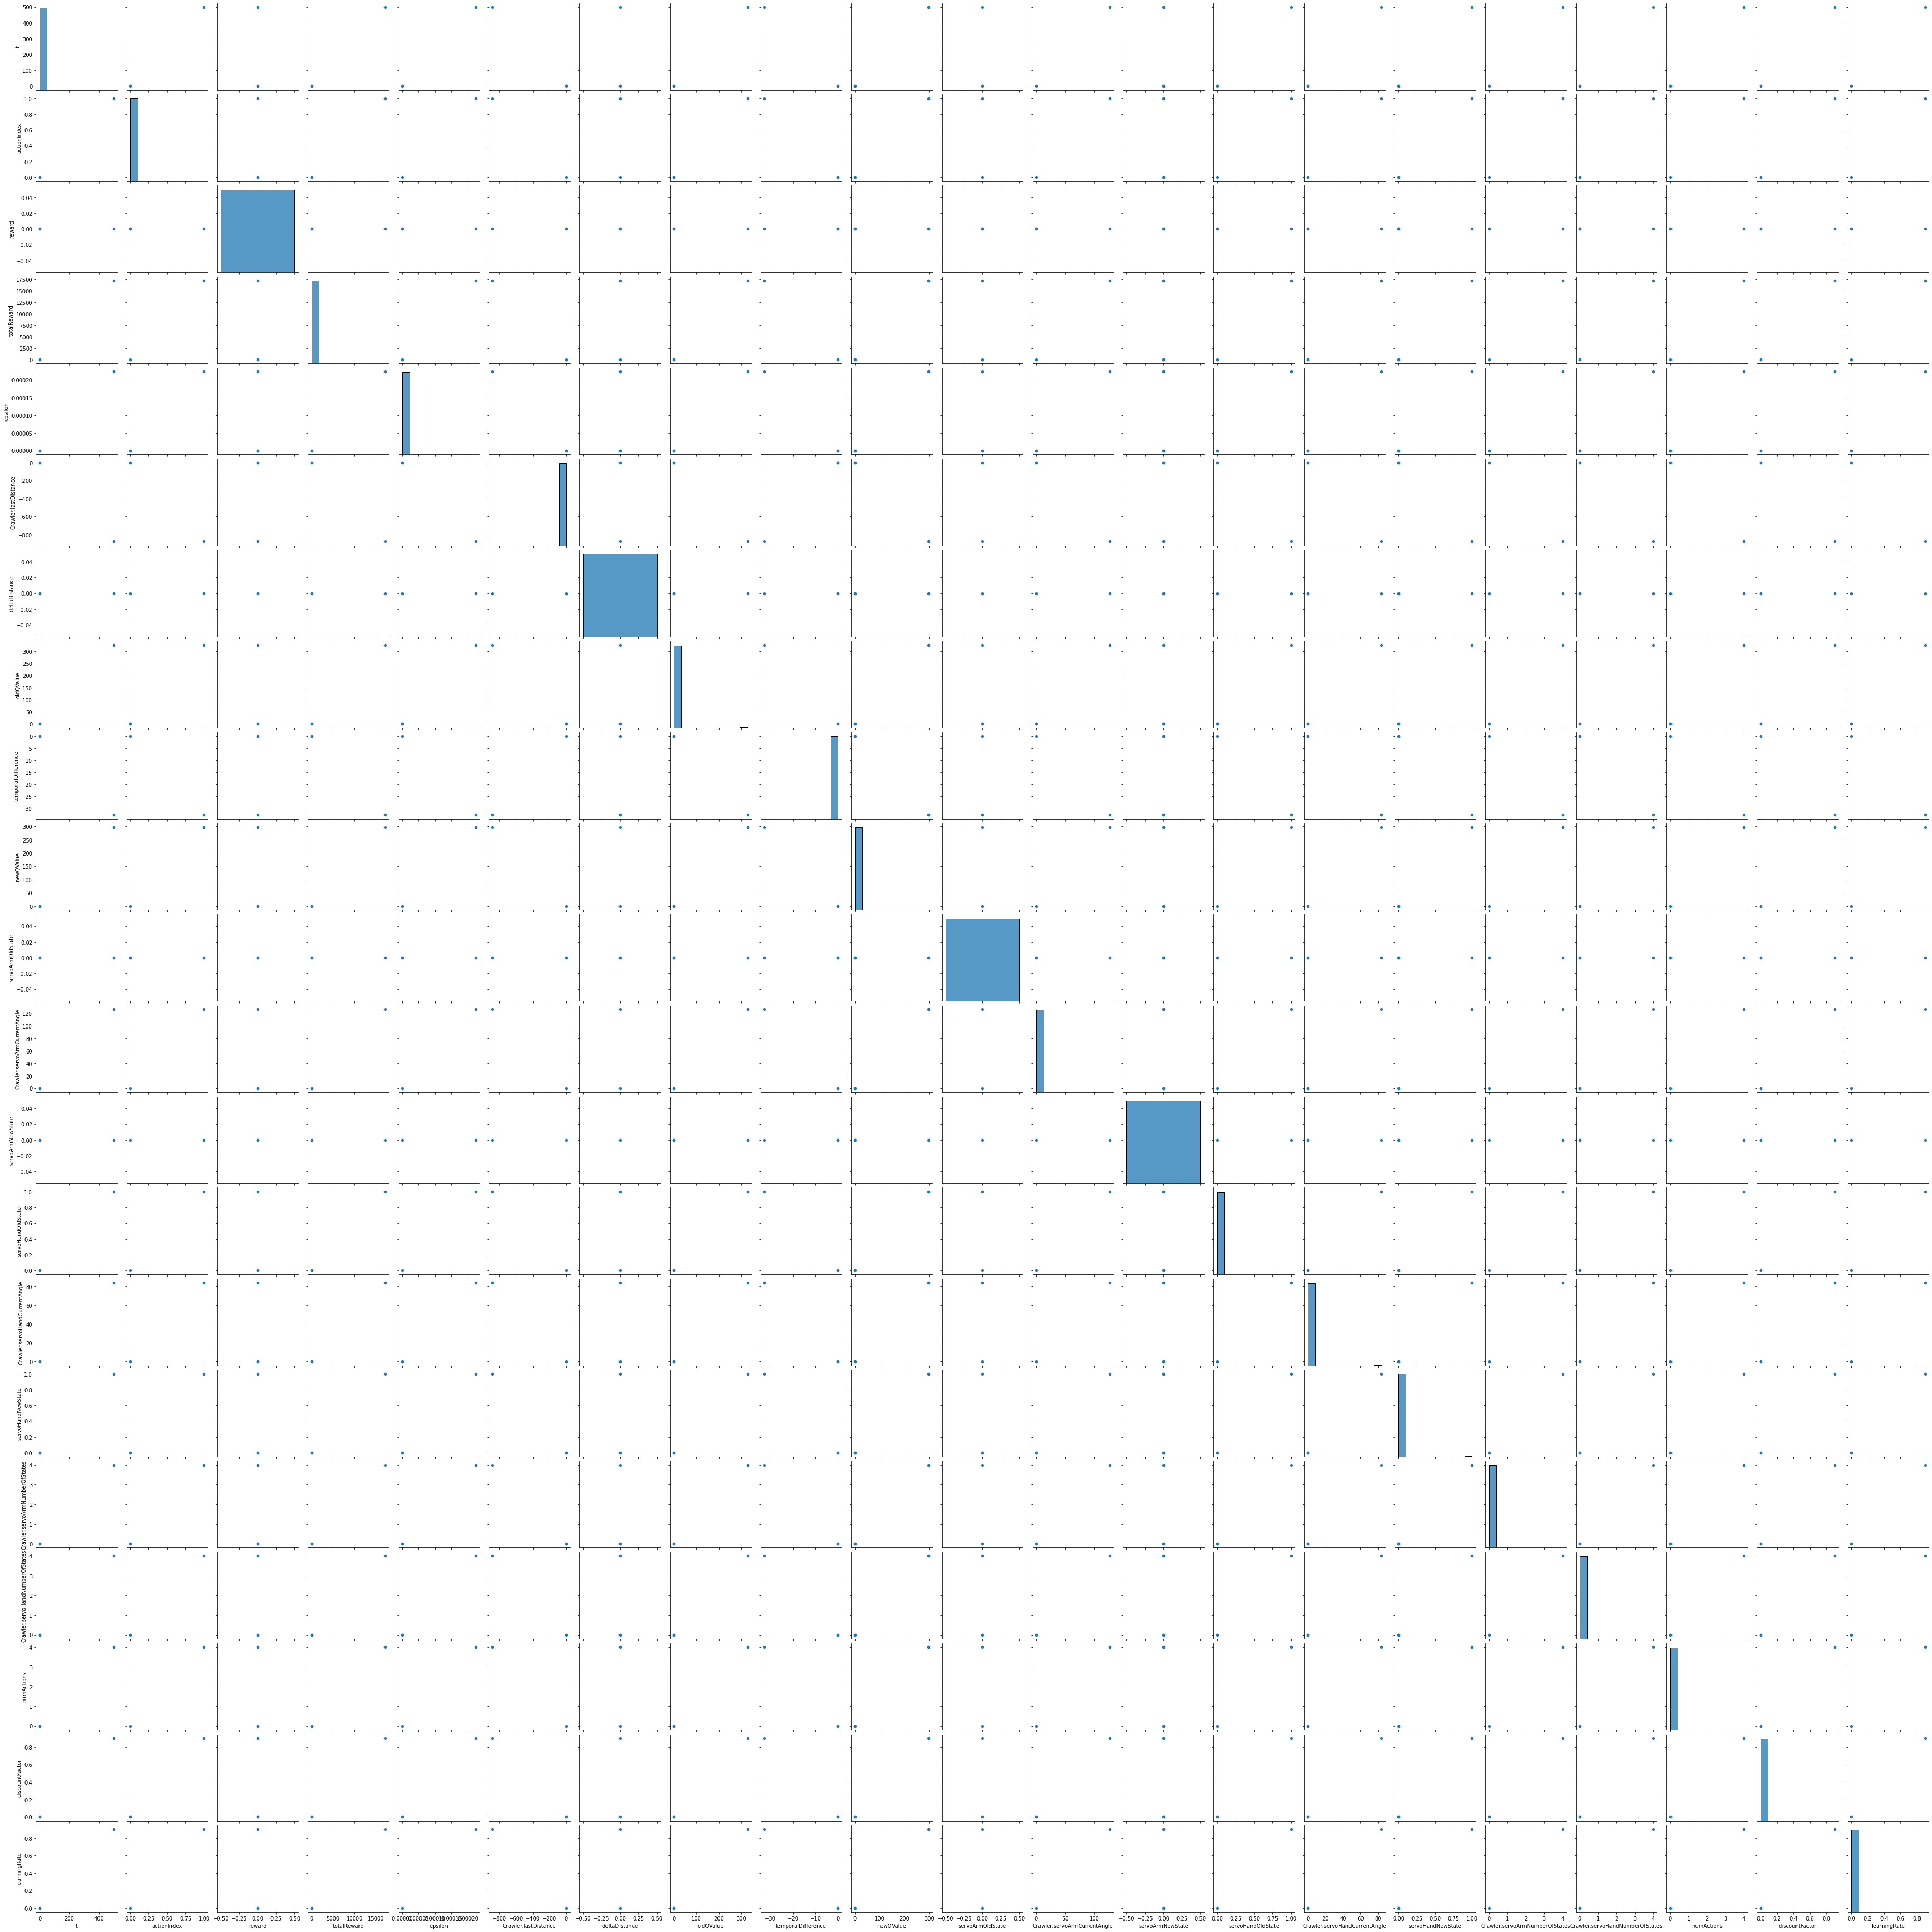

In [13]:
import seaborn as sns
sns.pairplot(df)
plt.show()

<AxesSubplot:>

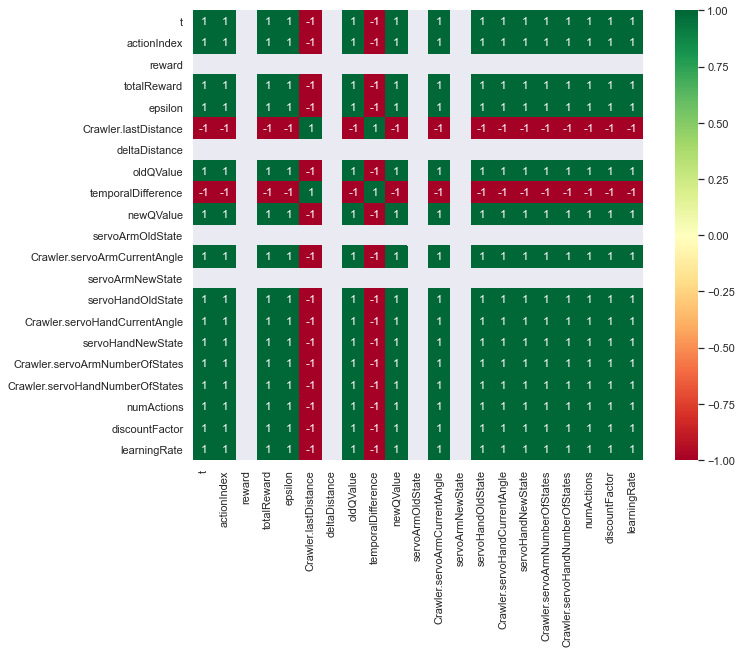

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr().round(2), square=True, cmap='RdYlGn', annot=True)


<AxesSubplot:xlabel='t', ylabel='totalReward'>

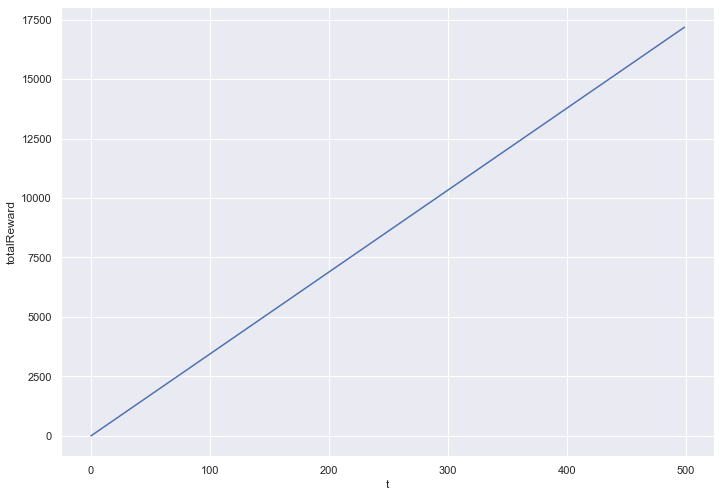

In [15]:
import seaborn as sns
sns.lineplot(x="t", y="totalReward", data=df)

<AxesSubplot:xlabel='t', ylabel='reward'>

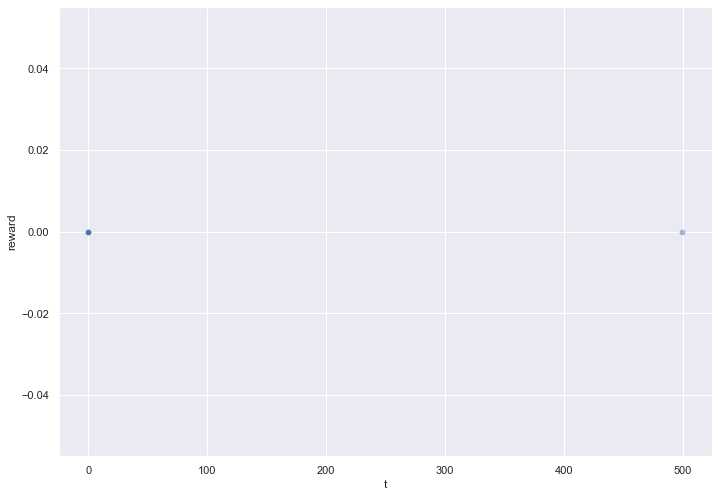

In [16]:
import seaborn as sns
sns.scatterplot(x="t", y="reward", data=df, alpha=0.5)

In [76]:
rohdaten_single_last_qtable = np.load("I:/Messwerte/qtables/499-qtable.npy")

In [77]:
df = pd.DataFrame(rohdaten_single_last_qtable)

ValueError: Must pass 2-d input